In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob, importlib
from natsort import natsorted
import bead_utils as bu
import scipy.signal as sp
import matplotlib.dates as mdates

Script to analyze the changes in charge vs time from Jiaxiang's data

In [6]:
data_path = ["/Volumes/DATA/20230724/1/",]
            #"/Users/dcmoore/Library/CloudStorage/GoogleDrive-david.c.moore@yale.edu/My Drive/yale/uspheres/jiaxiang_data/20230803/2/"]


<Figure size 432x288 with 0 Axes>

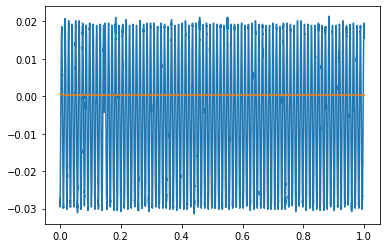

In [33]:
importlib.reload(bu)
flist = []
for d in data_path:
    flist += natsorted(glob.glob(d + "*.h5"))

## first make a correlation template
cdat, attr, _ = bu.get_data(flist[100])
plt.figure()
#f = np.fft.rfftfreq(len(cdat[:,10]),d=1/1e4)
#plt.plot(f,np.abs(np.fft.rfft(cdat[:,10]))**2)
#plt.xlim(85,90)

template = bu.correlation_template(cdat, attr, make_plots=True)

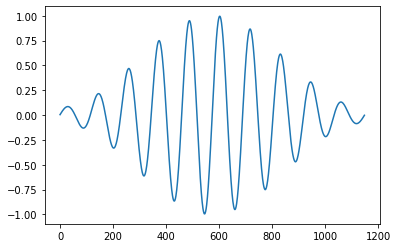

In [34]:
plt.plot(template)

In [36]:
charge_vec = []

for i,f in enumerate(flist):

    if(i%10 == 0): print("working on file %d: %s"%(i, f))
    
    cdat, attr, _ = bu.get_data(f)

    #bu.plot_raw_data(cdat, attr, nfft=2**19, do_psd=True, do_filt=True)
    
    fname = "corr_%d.png"%i
    corr_val = bu.plot_correlation_with_drive(cdat, template, attr, skip_drive=False)

    time = attr["Time"]

    charge_vec.append([time, corr_val])

np.save("charge_steps_20230724.npy", charge_vec)

working on file 0: /Volumes/DATA/20230724/1/LPmbar_xyzcool_0.h5
working on file 10: /Volumes/DATA/20230724/1/LPmbar_xyzcool_10.h5
working on file 20: /Volumes/DATA/20230724/1/LPmbar_xyzcool_20.h5
working on file 30: /Volumes/DATA/20230724/1/LPmbar_xyzcool_30.h5
working on file 40: /Volumes/DATA/20230724/1/LPmbar_xyzcool_40.h5
working on file 50: /Volumes/DATA/20230724/1/LPmbar_xyzcool_50.h5
working on file 60: /Volumes/DATA/20230724/1/LPmbar_xyzcool_60.h5
working on file 70: /Volumes/DATA/20230724/1/LPmbar_xyzcool_70.h5
working on file 80: /Volumes/DATA/20230724/1/LPmbar_xyzcool_80.h5
working on file 90: /Volumes/DATA/20230724/1/LPmbar_xyzcool_90.h5
working on file 100: /Volumes/DATA/20230724/1/LPmbar_xyzcool_100.h5
working on file 110: /Volumes/DATA/20230724/1/LPmbar_xyzcool_110.h5
working on file 120: /Volumes/DATA/20230724/1/LPmbar_xyzcool_120.h5
working on file 130: /Volumes/DATA/20230724/1/LPmbar_xyzcool_130.h5
working on file 140: /Volumes/DATA/20230724/1/LPmbar_xyzcool_140.h5
wo

KeyboardInterrupt: 

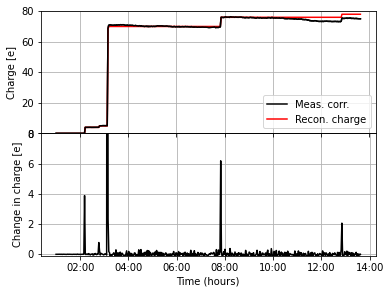

In [56]:
charge_vec = np.load("charge_steps.npy")

cal_fac = 1.55e1 ## wild guess

dt = []
for j,t in enumerate(charge_vec[:,0]):
    dt.append(bu.labview_time_to_datetime(t-charge_vec[0,0]))

plt.figure(figsize=(6,4.5))

plt.subplot(2,1,2)
#plt.figure(figsize=(8,6))
st = np.diff(charge_vec[:,1]/cal_fac)
plt.plot_date(dt[:-1], st, 'k-')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#plt.plot(np.diff(charge_vec[:,1]/cal_fac), 'k-')
plt.xlabel("Time (hours)")
plt.ylabel("Change in charge [e]")
plt.grid(True)
plt.ylim(-0.1,8)
#plt.xlim(0,dt[-1])
plt.subplots_adjust(hspace=0)

## now recon the real charge
st = np.round(st)
true_charge = np.cumsum(st)
plt.subplot(2,1,1)
plt.gca().set_xticklabels([])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
#plt.xlabel("Time (hours)")
plt.ylabel("Charge [e]")
plt.grid(True)
#plt.yticks(range(10))
plt.ylim(0,80)
plt.plot_date(dt, charge_vec[:,1]/cal_fac, 'k-', label="Meas. corr.")
plt.plot_date(dt[1:], true_charge, 'r-', label="Recon. charge")
plt.plot_date(dt, charge_vec[:,1]/cal_fac, 'k-')

plt.legend(loc="lower right")
plt.savefig('charge_steps.pdf')
plt.show()

Best fit, f_0=-38.1, gamma=-5.7


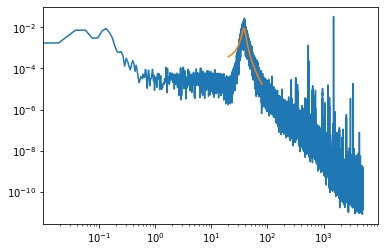

239.65869210548746 35.5408052263137


In [7]:
importlib.reload(bu)

cdat, attr, _ = bu.get_data(flist[39])
omega0, gam = bu.fit_tf(cdat, attr)

print(omega0, gam)

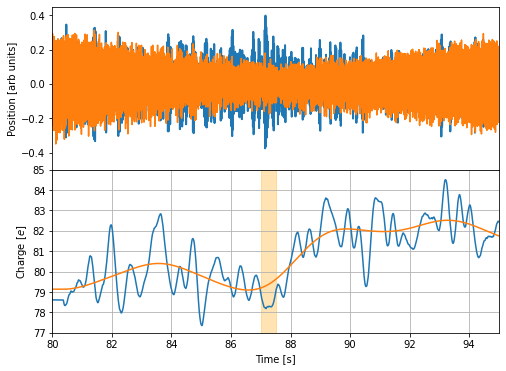

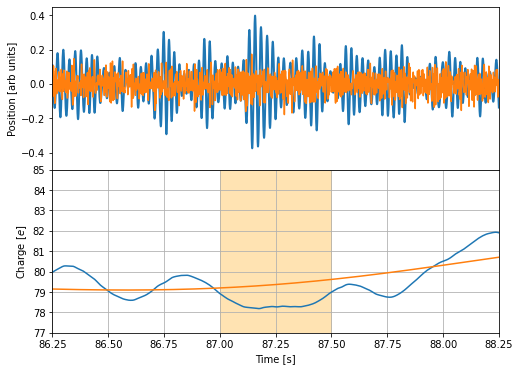

In [16]:
importlib.reload(bu)

#fidx, trange = 40, [93.3, 94]
#fidx, trange = 73, [45, 55]
#fidx, trange = 231, [87.5, 92.5]

fidx, trange = 401, [80,95] 
#fidx, trange = 401, [87,87.4] 
for i,f in enumerate(flist[fidx:(fidx+1)]):

    
    cdat, attr, _ = bu.get_data(f)

    #omega0 = 2*np.pi*87
    #bu.plot_raw_data(cdat, attr, nfft=2**19, do_psd=False, do_filt=True)
    bu.plot_impulse(cdat, template, attr, [omega0,gam], trange=trange, skip_drive=True, make_plots=True)
    bu.plot_impulse(cdat, template, attr, [omega0,gam], trange=[86.25, 88.25], skip_drive=True, make_plots=True)
